In [264]:
#데이터 불러오기
import pandas as pd
df=pd.read_csv('data/df.csv')

In [265]:
df

,날짜,국적지역,입국자수
0,2022-01-01,그리스,390
1,2022-02-01,그리스,307
2,2022-03-01,그리스,418
3,2022-04-01,그리스,292
4,2022-05-01,그리스,425
...,...,...,...
2838,2024-08-01,홍콩,61592
2839,2024-09-01,홍콩,39815
2840,2024-10-01,홍콩,52005
2841,2024-11-01,홍콩,46366


In [266]:
# 날짜 변환 및 연도/월 컬럼 추가
df["날짜"] = pd.to_datetime(df["날짜"])
df["연도"] = df["날짜"].dt.year
df["월"] = df["날짜"].dt.month

In [267]:
# 국가별 평균 입국자 수(Target Encoding) 적용
df["국가코드"] = df.groupby("국적지역")["입국자수"].transform("mean")

In [268]:
df.loc[df['국적지역']=='그리스']

,날짜,국적지역,입국자수,연도,월,국가코드
0,2022-01-01,그리스,390,2022,1,682.055556
1,2022-02-01,그리스,307,2022,2,682.055556
2,2022-03-01,그리스,418,2022,3,682.055556
3,2022-04-01,그리스,292,2022,4,682.055556
4,2022-05-01,그리스,425,2022,5,682.055556
5,2022-06-01,그리스,410,2022,6,682.055556
6,2022-07-01,그리스,607,2022,7,682.055556
7,2022-08-01,그리스,596,2022,8,682.055556
8,2022-09-01,그리스,460,2022,9,682.055556
9,2022-10-01,그리스,588,2022,10,682.055556


# 3. 미국 으로 학습시켜 전체국가 적용해보기

In [211]:
#미국 데이터만 추출하여 학습
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


usa_df = df[df["국적지역"] == "미국"]
X = usa_df[["연도", "월"]]
y = usa_df["입국자수"]

#스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#트레이닝, 테스트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

#모델 학습
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [212]:
#성능평가
from sklearn.metrics import r2_score
y_pred = poly_model.predict(X_test)
r2_score(y_test, y_pred)


0.8298968970068763

In [213]:
#모델 저장
import joblib
joblib.dump(poly_model, "regressormodel.pkl")
#스케일러 저장
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [214]:
#해당 모델과 스케일러로 그리스 테스트
model = joblib.load("regressormodel.pkl")
scaler = joblib.load("scaler.pkl")

country = "그리스"
country_df = df[df["국적지역"] == country]

# X, y 분리
X = country_df[["연도", "월"]]
y = country_df["입국자수"]
# X 데이터 스케일링 적용
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)

y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

-145380.4800737123

In [ ]:
#미국 그리스 편차가 심해서 불가

# 1. 리니어리그레서로 평가

In [215]:
# 특징 및 타겟 설정
X = df[["연도", "월", "국가코드"]]
y = df["입국자수"]

In [216]:
#스케일링
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [217]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
from sklearn.linear_model import LinearRegression


model=LinearRegression()

In [219]:
model.fit(X_train, y_train)

LinearRegression()

In [220]:
y_pred=model.predict(X_test)

In [221]:
#모델 평가
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.58430203061955

In [222]:
#너무 낮음

# 2. 다항 회귀모델 적용

In [226]:
# 다항 회귀 모델 적용 (2차 다항식)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [227]:
y_pred = poly_model.predict(X_test)

In [228]:
r2_score(y_test, y_pred)

0.9064511078676363

In [229]:
# 2025~2026년 예측 데이터 생성
import numpy as np


future_dates = pd.DataFrame({
    "연도": np.repeat([2025, 2026], 12 * df["국적지역"].nunique()),
    "월": list(range(1, 13)) * 2 * df["국적지역"].nunique(),
    "국적지역": list(df["국적지역"].unique()) * 24
})

In [230]:
# 국가코드(Target Encoding) 적용
future_dates = future_dates.merge(df[["국적지역", "국가코드"]].drop_duplicates(), on="국적지역", how="left")


In [231]:
# 다항 회귀 모델을 활용한 예측
future_predictions = poly_model.predict(future_dates[["연도", "월", "국가코드"]])
future_dates["예측 입국자수"] = future_predictions

In [232]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_2591/1437923177.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.lineplot(data=future_dates, x="월", y="예측 입국자수", hue="국적지역", ci=None)


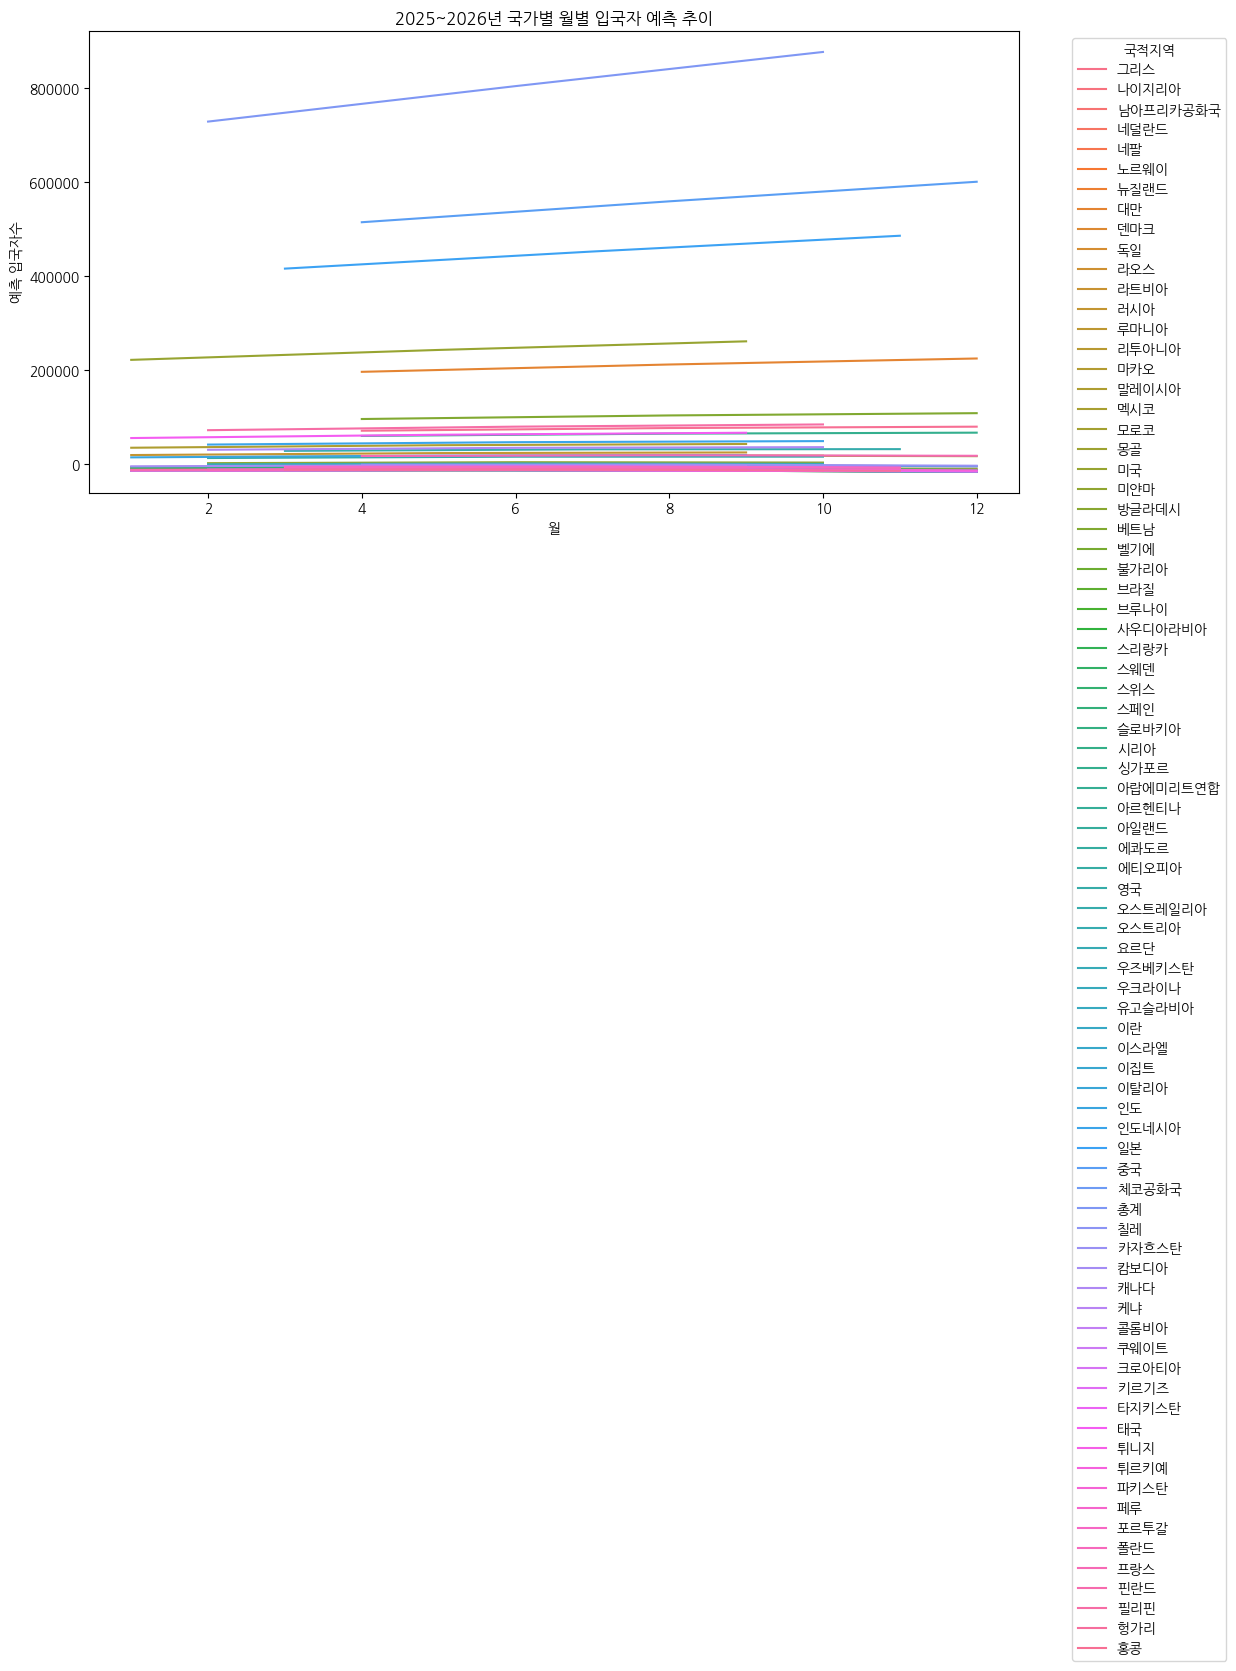

In [233]:
# 예측된 데이터 시각화 (국가별 입국자수 추이)
from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(12, 6))
sb.lineplot(data=future_dates, x="월", y="예측 입국자수", hue="국적지역", ci=None)
plt.title("2025~2026년 국가별 월별 입국자 예측 추이")
plt.xlabel("월")
plt.ylabel("예측 입국자수")
plt.legend(title="국적지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [164]:
future_dates['예측 입국자수'] = future_dates['예측 입국자수'].astype(int)

In [166]:
future_dates.loc[future_dates['국적지역']== '그리스']

,연도,월,국적지역,국가코드,예측 입국자수
0,2025,1,그리스,682.055556,-8060
80,2025,9,그리스,682.055556,-7227
160,2025,5,그리스,682.055556,-6245
240,2025,1,그리스,682.055556,-8060
320,2025,9,그리스,682.055556,-7227
400,2025,5,그리스,682.055556,-6245
480,2025,1,그리스,682.055556,-8060
560,2025,9,그리스,682.055556,-7227
640,2025,5,그리스,682.055556,-6245
720,2025,1,그리스,682.055556,-8060


In [117]:
df.loc[df['국적지역']=='미국']

,날짜,국적지역,입국자수,연도,월,국가코드
720,2022-01-01,미국,20123,2022,1,88850.111111
721,2022-02-01,미국,21360,2022,2,88850.111111
722,2022-03-01,미국,22817,2022,3,88850.111111
723,2022-04-01,미국,35858,2022,4,88850.111111
724,2022-05-01,미국,46905,2022,5,88850.111111
725,2022-06-01,미국,60140,2022,6,88850.111111
726,2022-07-01,미국,59836,2022,7,88850.111111
727,2022-08-01,미국,57244,2022,8,88850.111111
728,2022-09-01,미국,65182,2022,9,88850.111111
729,2022-10-01,미국,80476,2022,10,88850.111111


In [116]:
future_dates.loc[future_dates['국적지역']=='미국']

,연도,월,국적지역,국가코드,예측 입국자수
20,2025,9,미국,88850.111111,-1.406600e+13
100,2025,5,미국,88850.111111,-1.406821e+13
180,2025,1,미국,88850.111111,-1.407042e+13
260,2025,9,미국,88850.111111,-1.406600e+13
340,2025,5,미국,88850.111111,-1.406821e+13
420,2025,1,미국,88850.111111,-1.407042e+13
500,2025,9,미국,88850.111111,-1.406600e+13
580,2025,5,미국,88850.111111,-1.406821e+13
660,2025,1,미국,88850.111111,-1.407042e+13
740,2025,9,미국,88850.111111,-1.406600e+13


In [234]:
# 입국 인원이 음수가 나옴

# 4. 로그 변환(Log Transform) 적용

In [269]:
df

,날짜,국적지역,입국자수,연도,월,국가코드
0,2022-01-01,그리스,390,2022,1,682.055556
1,2022-02-01,그리스,307,2022,2,682.055556
2,2022-03-01,그리스,418,2022,3,682.055556
3,2022-04-01,그리스,292,2022,4,682.055556
4,2022-05-01,그리스,425,2022,5,682.055556
...,...,...,...,...,...,...
2838,2024-08-01,홍콩,61592,2024,8,28560.555556
2839,2024-09-01,홍콩,39815,2024,9,28560.555556
2840,2024-10-01,홍콩,52005,2024,10,28560.555556
2841,2024-11-01,홍콩,46366,2024,11,28560.555556


In [270]:
df["입국자수_log"] = np.log1p(df["입국자수"])  # log(1 + x) 변환

# X, y 설정 (로그 변환된 값으로 학습)
X = df[["연도", "월", "국가코드"]]
y = df["입국자수_log"]

#스케일링 StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [271]:
X

,연도,월,국가코드
0,2022,1,682.055556
1,2022,2,682.055556
2,2022,3,682.055556
3,2022,4,682.055556
4,2022,5,682.055556
...,...,...,...
2838,2024,8,28560.555556
2839,2024,9,28560.555556
2840,2024,10,28560.555556
2841,2024,11,28560.555556


In [272]:
#스케일링
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [273]:
# 트레이닝, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [274]:
# 다항 회귀 모델 적용 (2차 다항식)
poly_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [275]:
# 예측
y_pred = poly_model.predict(X_test)

In [276]:
# 성능 평가
r2_score(y_test, y_pred)

0.7656194956202318

In [257]:
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

In [253]:
y_pred_original

array([7.33414373e+02, 3.44160456e+02, 1.06339660e+03, 1.00251913e+03,
       8.52322814e+01, 1.17585312e+04, 1.52357596e+03, 2.00314725e+03,
       6.96531933e+02, 1.98138892e+02, 3.86835735e+04, 1.03586940e+02,
       1.12187463e+03, 5.65608321e+02, 9.42174010e+02, 9.24674385e+02,
       7.69918767e+02, 1.65481372e+02, 8.04615452e+02, 3.13696852e+02,
       1.25253181e+02, 4.12134023e+04, 9.37698054e+02, 1.97825737e+03,
       1.17262216e+03, 6.78673250e+02, 1.79910405e+03, 9.56555514e+02,
       9.16731750e+02, 8.71397654e+01, 1.61981726e+05, 6.04787073e+04,
       9.61422391e+02, 3.18138720e+04, 9.56884321e+02, 1.43309816e+03,
       1.97863870e+03, 5.83653500e+02, 7.58615588e+02, 7.78741340e+02,
       1.66642191e+02, 9.16771406e+03, 6.56134250e+02, 1.51751499e+02,
       5.56837705e+02, 1.44198255e+03, 8.41066439e+02, 9.62906760e+02,
       8.61637457e+02, 1.14988055e+03, 1.11316822e+03, 7.60748389e+02,
       2.37724765e+02, 9.21471872e+02, 1.33843869e+02, 7.90098005e+02,
      

In [258]:
comparison_df = pd.DataFrame({
    "실제값(y_test)": y_test_original.values,
    "예측값(y_pred)": y_pred_original
})

In [259]:
print(comparison_df.head(10))

   실제값(y_test)   예측값(y_pred)
0        137.0    733.414373
1         99.0    344.160456
2       3350.0   1063.396601
3       2411.0   1002.519133
4        105.0     85.232281
5      10785.0  11758.531207
6       2483.0   1523.575955
7       4041.0   2003.147251
8        204.0    696.531933
9        499.0    198.138892


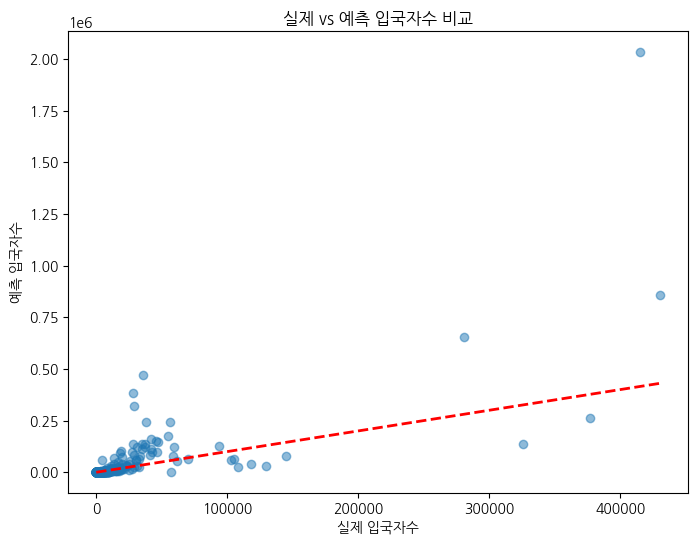

In [260]:
import matplotlib.pyplot as plt

# 산점도로 비교
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', lw=2)
plt.xlabel("실제 입국자수")
plt.ylabel("예측 입국자수")
plt.title("실제 vs 예측 입국자수 비교")
plt.show()

In [262]:
# 2025~2026년 예측을 위한 데이터 생성
future_dates = pd.DataFrame({
    "연도": np.repeat([2025, 2026], 12 * df["국적지역"].nunique()),  # 모든 국가에 대해 2025~2026년 12개월 반복
    "월": list(range(1, 13)) * 2 * df["국적지역"].nunique(),  # 1~12월 반복
    "국적지역": list(df["국적지역"].unique()) * 24  # 모든 국가별 데이터 포함
})

# 국가코드 추가 (기존 데이터에서 가져오기)
future_dates = future_dates.merge(df[["국적지역", "국가코드"]].drop_duplicates(), on="국적지역", how="left")

# 스케일링 적용
future_scaled = scaler.transform(future_dates[["연도", "월", "국가코드"]])

# 모델 예측 수행
future_predictions = poly_model.predict(future_scaled)

# 로그 변환된 경우 원래 값으로 변환
future_dates["예측 입국자수"] = np.expm1(future_predictions)  # 예측값을 원래 값으로 변환

# 예측 결과 확인
future_dates['예측 입국자수'] = future_dates['예측 입국자수'].astype(int)
future_dates.loc[future_dates["국적지역"] == "그리스"]


,연도,월,국적지역,국가코드,예측 입국자수
0,2025,1,그리스,682.055556,984517844
80,2025,9,그리스,682.055556,735173429
160,2025,5,그리스,682.055556,2046646390
240,2025,1,그리스,682.055556,984517844
320,2025,9,그리스,682.055556,735173429
400,2025,5,그리스,682.055556,2046646390
480,2025,1,그리스,682.055556,984517844
560,2025,9,그리스,682.055556,735173429
640,2025,5,그리스,682.055556,2046646390
720,2025,1,그리스,682.055556,984517844
